### Imports
Use pillow to convert image to colorvalues in an array.
\
Use matplotlib to display array as a image.

In [ ]:
import numpy
from PIL import Image
from matplotlib import pyplot as plt

## Preperatory work
Before we start the assignment, we need to prepare by converting the attached image into an array with its instesity as an int. There is no RGB value, because we are looking at a black/white image, so we can use the first value only.


In [ ]:
image = Image.open("image001.png")

image_array = numpy.asarray(image)

## Task A) & B)
Calculate the derivative for the x direction and the y direction and map them into seperate arrays. \
Calculate them using the formula: $$f_x(x,y) \approx \frac{f(x+\Delta x,y) - f(x-\Delta x,y)}{2\cdot \Delta x}$$ where $\Delta x = 1$

Finds the derivative in x direction for a point in position x, y.
This is done by finding the value of the previous pixel and also the next pixel (In the x direction), and subtracting them and dividing it by 2. The function returns said derivitive in the specified position.

In [ ]:
def find_fx(x, y):
    fx = (image_array[x+1][y][0]-image_array[x-1][y][0])/2
    return fx

Create an array filled with zeroes in the correct shape, using numpys shape function.


In [ ]:
fx_matrix = numpy.zeros((image_array.shape[0], image_array.shape[1]))

Double for loop to go through all the elements/pixel of the image, and run it through find_fx to find the derivative of all the points in the picture and append them to the fx_matrix.

In [18]:

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fx_matrix[i][j] = find_fx(i, j)

<ipython-input-17-2d3f617c8f1f>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  fx = (image_array[x+1][y][0]-image_array[x-1][y][0])/2



The same as with finding Fx, but in y direction

In [ ]:

def find_fy(x, y):
    fy = (image_array[x][y+1][0]-image_array[x][y-1][0])/2
    return fy

fy_matrix = numpy.zeros((image_array.shape[0], image_array.shape[1]))

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fy_matrix[i][j] = find_fy(i, j)


<ipython-input-13-f0b64462021b>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  fx = (image_array[x+1][y][0]-image_array[x-1][y][0])/2
<ipython-input-13-f0b64462021b>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  fy = (image_array[x][y+1][0]-image_array[x][y-1][0])/2


Show f_x array as an image

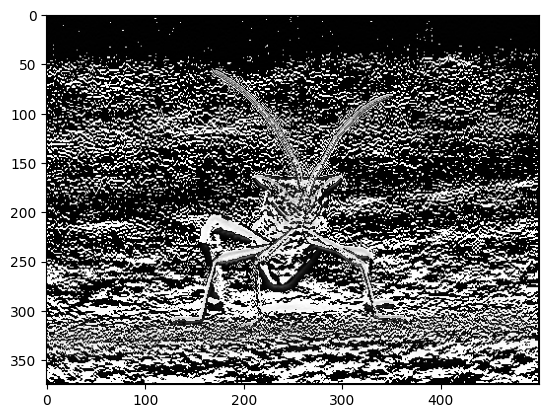

In [ ]:
plt.imshow(fx_matrix, cmap='gray')
plt.show()

Show f_y as an image




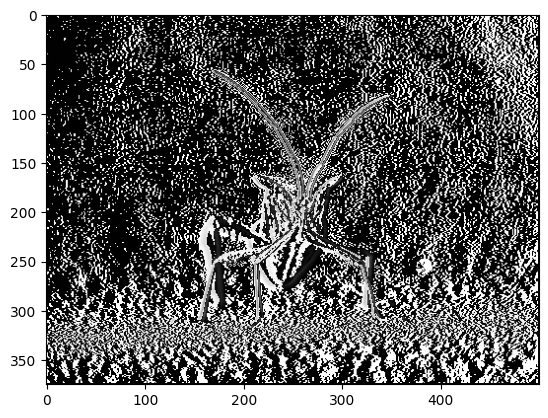

In [ ]:
plt.imshow(fy_matrix, cmap='gray')
plt.show()

## Task c)
Calculate the length of the gradient for each point and append them to a matrix named `fgradabs` and draw the image.

Create the array in the correct shape and for loop through all the elements. It then finds then finds the length of the gradient in the corresponding pixel and appends it into the fgradabs array
\
The length of the gradient is calculated with the formula: $$|\nabla f|=\sqrt{f_x^2 + f_y^2 }.$$

In [20]:
fgradabs = numpy.zeros((image_array.shape[0], image_array.shape[1]))

for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        fgradabs[i][j] = numpy.sqrt(fx_matrix[i][j]**2 + fy_matrix[i][j]**2)



Display fgradabs as an image

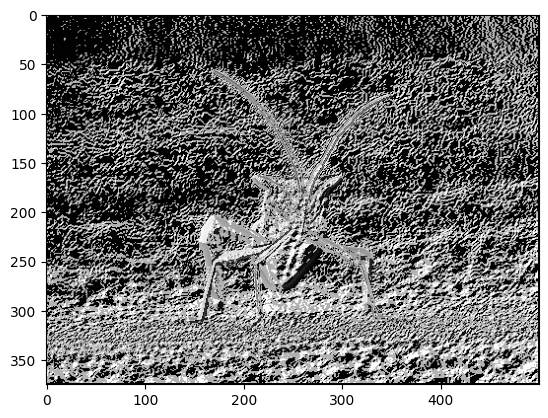

In [21]:
plt.imshow(fgradabs, cmap='gray')
plt.show()

## Task d)
Find the highest and lowest value in fgradabs and then scale all the values between 0 and 1. Append the result in a matrix with the same name and display it. It should display the same image as in task c)

In [22]:
highest_value = fgradabs[0][0]
lowest_value = fgradabs[0][0]
for i in range(0, image_array.shape[0]-1):
    for j in range(0, image_array.shape[1]-1):
        if fgradabs[i][j] > highest_value:
            highest_value = fgradabs[i][j]
        if fgradabs[i][j] < lowest_value:
            lowest_value = fgradabs[i][j]

print(highest_value, lowest_value)


180.31222920256963 0.0


Scale all the values by substracting by the lowest value and dividing by the difference between the highest and lowest value.

In [24]:
fgradabs = (fgradabs - lowest_value) / (highest_value - lowest_value)

Show the new image with scaled values.

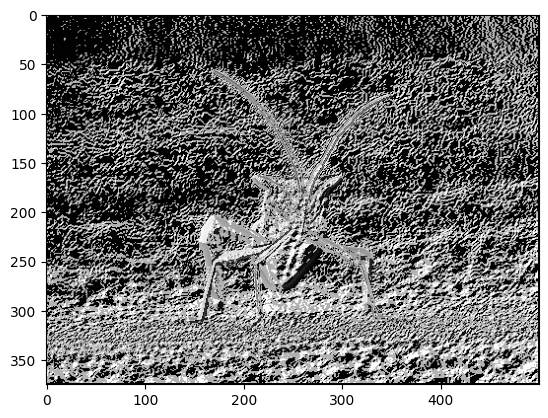

In [25]:
plt.imshow(fgradabs, cmap='gray')
plt.show()

## Task e)
There are no true edges in real life, but only what we precieve as edges. Edges are basically high contrast between color, so we can detect edges by looking where there is a large gap in the color value. We are obviously looking at a black/white image, so we are looking at the black/white contrast. We have already mapped the gradients, so we can look where there are jumps and where they are smooth and determine where the edges are.